In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
# fetch_housing_data()

In [5]:
dataset=load_housing_data()

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
dataset['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
dataset.describe() # show the sumary of numerical attributes

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


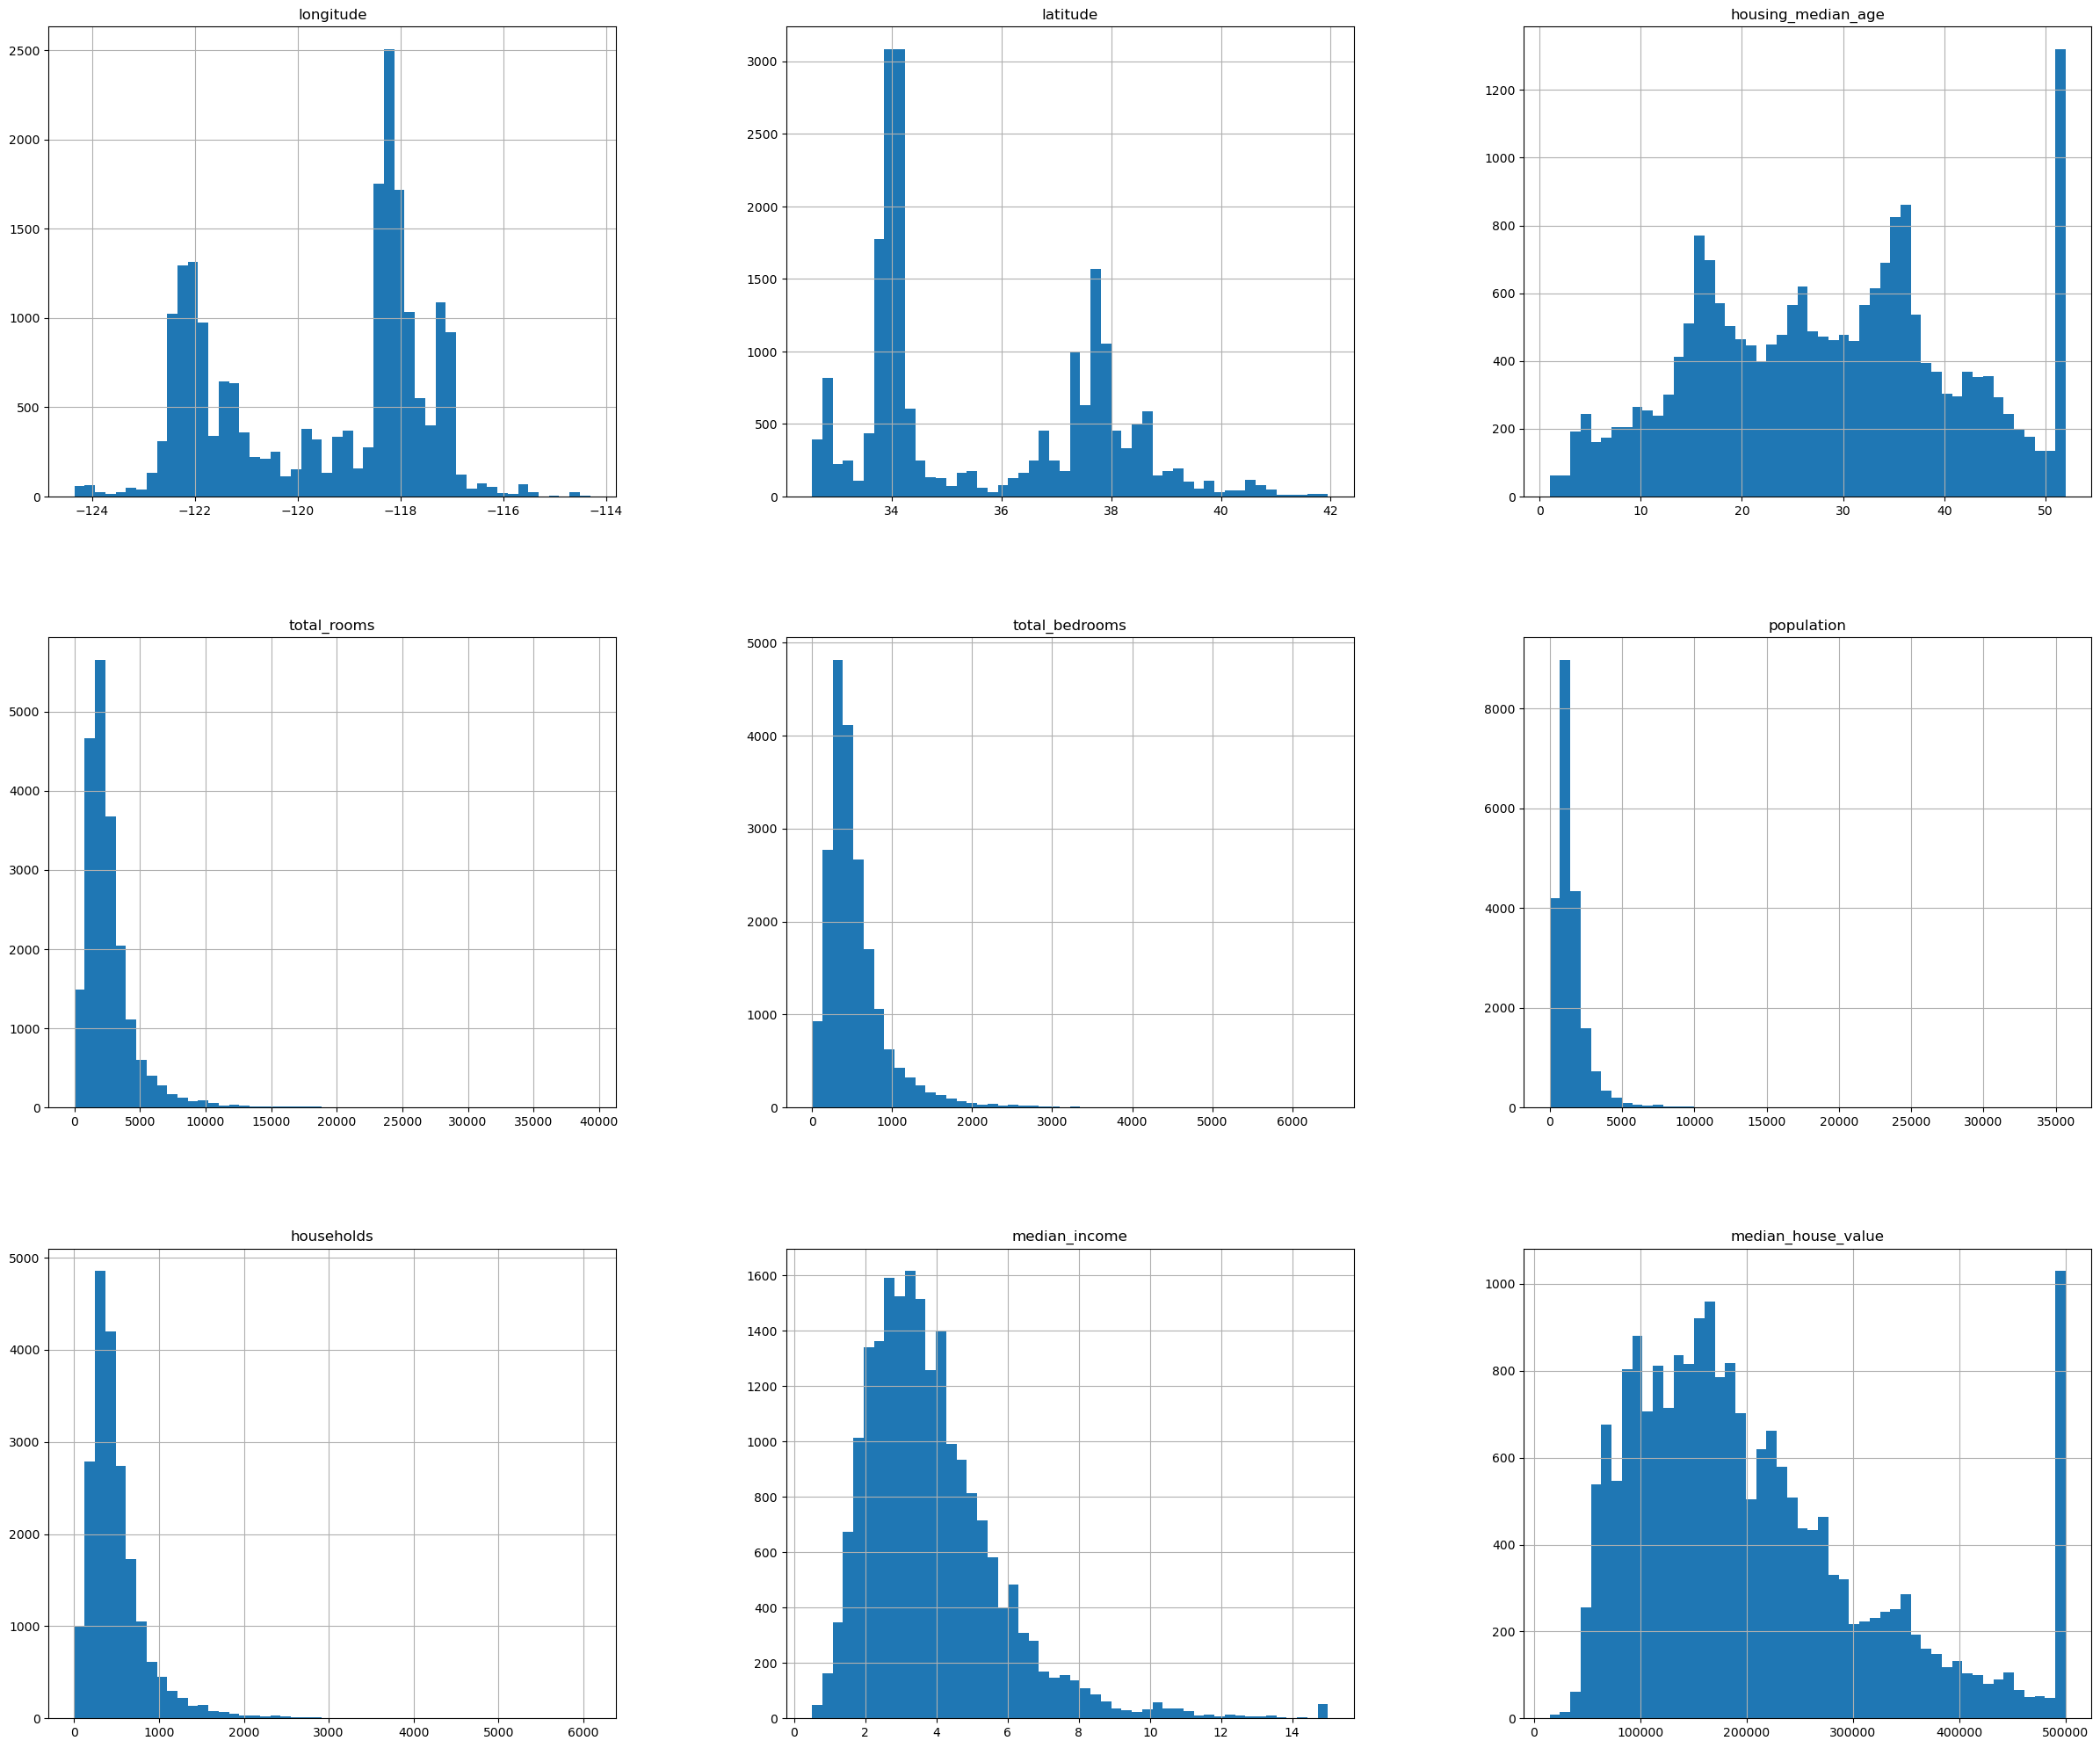

In [9]:
dataset.hist(bins=50, figsize=(30,25))
plt.show()

In [10]:
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)

print('train set len: ', len(train_set))
print('test set len: ', len(test_set))

train set len:  16512
test set len:  4128


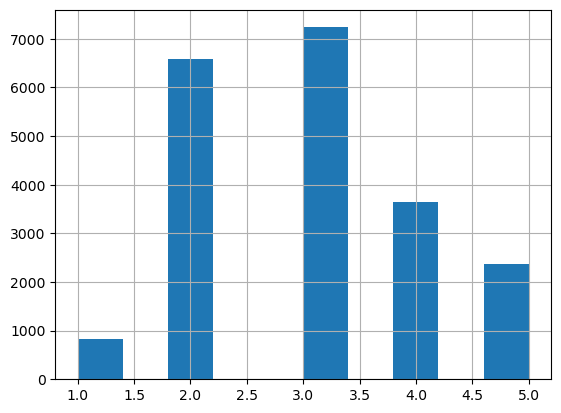

In [11]:
dataset['income_cat'] = pd.cut(dataset['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

dataset['income_cat'].hist()
plt.show()

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

In [13]:
split = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
for train_index, test_index in split.split(dataset, dataset['income_cat']):
  strat_train_set = dataset.iloc[train_index]
  strat_test_set = dataset.iloc[test_index]

In [14]:
housing = strat_train_set.drop(['median_house_value'], axis=1)
housing_lables = strat_train_set['median_house_value'].copy()

In [15]:
print("\nHousing dataset:")
housing.head()


Housing dataset:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
19712,-121.64,39.15,15.0,2659.0,396.0,1159.0,407.0,5.2340,INLAND,4
7414,-118.23,33.95,43.0,1683.0,520.0,2190.0,494.0,2.2391,<1H OCEAN,2
3110,-117.70,35.60,16.0,2678.0,483.0,1473.0,487.0,3.8580,INLAND,3
20210,-119.23,34.30,18.0,1713.0,244.0,690.0,239.0,6.9483,NEAR OCEAN,5
4766,-118.36,34.03,43.0,1690.0,379.0,1017.0,359.0,2.1078,<1H OCEAN,2


In [16]:
print("\nHousing lables dataset:")
housing_lables.head()


Housing lables dataset:


19712    124900.0
7414     152800.0
3110      70200.0
20210    404300.0
4766     133500.0
Name: median_house_value, dtype: float64

In [17]:
from sklearn.impute import SimpleImputer

In [18]:
imputer = SimpleImputer(strategy='median')

In [19]:
housing_num=housing.drop('ocean_proximity', axis=1)
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
19712,-121.64,39.15,15.0,2659.0,396.0,1159.0,407.0,5.2340,4
7414,-118.23,33.95,43.0,1683.0,520.0,2190.0,494.0,2.2391,2
3110,-117.70,35.60,16.0,2678.0,483.0,1473.0,487.0,3.8580,3
20210,-119.23,34.30,18.0,1713.0,244.0,690.0,239.0,6.9483,5
4766,-118.36,34.03,43.0,1690.0,379.0,1017.0,359.0,2.1078,2


In [20]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [21]:
imputer.statistics_

array([-118.48  ,   34.25  ,   29.    , 2143.    ,  436.    , 1169.    ,
        411.    ,    3.5293,    3.    ])

In [22]:
housing_num.median().values

C:\Users\dulha\AppData\Local\Temp\ipykernel_1776\3605723347.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing_num.median().values


array([-118.48  ,   34.25  ,   29.    , 2143.    ,  436.    , 1169.    ,
        411.    ,    3.5293])

In [23]:
X=imputer.transform(housing_num)

In [24]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
0,-121.64,39.15,15.0,2659.0,396.0,1159.0,407.0,5.2340,4.0
1,-118.23,33.95,43.0,1683.0,520.0,2190.0,494.0,2.2391,2.0
2,-117.70,35.60,16.0,2678.0,483.0,1473.0,487.0,3.8580,3.0
3,-119.23,34.30,18.0,1713.0,244.0,690.0,239.0,6.9483,5.0
4,-118.36,34.03,43.0,1690.0,379.0,1017.0,359.0,2.1078,2.0


In [25]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
19712,INLAND
7414,<1H OCEAN
3110,INLAND
20210,NEAR OCEAN
4766,<1H OCEAN
1572,<1H OCEAN
7990,<1H OCEAN
15879,NEAR BAY
1987,INLAND
27,NEAR BAY


In [26]:
from sklearn.preprocessing import OrdinalEncoder

In [27]:
ordinal_encoder = OrdinalEncoder()

In [28]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [0.],
       [1.],
       [4.],
       [0.],
       [0.],
       [0.],
       [3.],
       [1.],
       [3.]])

In [29]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
cat_encoder = OneHotEncoder()

In [32]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [33]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [34]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [35]:
from sklearn.base import BaseEstimator, TransformerMixin

In [36]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
         self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
    
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [38]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

In [39]:
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-1.04148597e+00,  1.65121567e+00, -1.07430161e+00, ...,
         4.16033851e-01, -1.91016683e-02, -1.04023120e+00],
       [ 6.60426439e-01, -7.80722331e-01,  1.15609077e+00, ...,
        -7.77138503e-01,  1.41077378e-01,  1.53642540e+00],
       [ 9.24946550e-01, -9.04969476e-03, -9.94644741e-01, ...,
         2.13246095e-02, -1.22271870e-03, -5.34213113e-01],
       ...,
       [-7.37038299e-01,  2.21243214e+00,  1.87300261e+00, ...,
         6.99488383e-01, -4.18980414e-02, -3.74116035e-01],
       [ 6.85381167e-01,  4.72661102e-01, -4.37046645e-01, ...,
         2.19502752e-01, -3.87026165e-02, -4.52204351e-02],
       [-1.18123245e+00,  4.35246671e-01,  1.23574764e+00, ...,
         1.13588186e+00, -1.38087995e-01, -5.11968991e-01]])

In [40]:
from sklearn.compose import ColumnTransformer

In [41]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

In [42]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
 ])

In [43]:
full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('attribs_adder',
                                                  CombinedAttributesAdder()),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income',
                                  'income_cat']),
                                ('cat', OneHotEncoder(), ['ocean_proximity'])])

In [44]:
housing_prepared = full_pipeline.fit_transform(housing)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lin_reg = LinearRegression()

In [47]:
lin_reg.fit(housing_prepared, housing_lables)

LinearRegression()

In [48]:
pd.DataFrame(housing_prepared)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.041486,1.651216,-1.074302,0.010688,-0.341117,-0.233859,-0.245005,0.719590,0.941823,0.416034,-0.019102,-1.040231,0.0,1.0,0.0,0.0,0.0
1,0.660426,-0.780722,1.156091,-0.443122,-0.041341,0.679858,-0.013983,-0.859588,-0.954687,-0.777139,0.141077,1.536425,1.0,0.0,0.0,0.0,0.0
2,0.924947,-0.009050,-0.994645,0.019522,-0.130790,0.044422,-0.032571,-0.005960,-0.006432,0.021325,-0.001223,-0.534213,0.0,1.0,0.0,0.0,0.0
3,0.161332,-0.617034,-0.835331,-0.429173,-0.708584,-0.649507,-0.691117,1.623522,1.890078,0.658079,-0.015125,-1.144686,0.0,0.0,0.0,0.0,1.0
4,0.595544,-0.743308,1.156091,-0.439867,-0.382215,-0.359705,-0.372466,-0.928821,-0.954687,-0.280740,-0.020597,0.172593,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-1.216169,1.281748,0.359522,-1.157779,-1.223521,-1.194546,-1.243447,-0.185291,-0.006432,-0.279916,-0.062372,-0.019501,0.0,1.0,0.0,0.0,0.0
16508,0.944910,-1.000532,-0.516704,-0.849505,-0.863307,-0.965009,-0.908862,-0.782868,-0.954687,-0.110770,-0.091868,0.144202,1.0,0.0,0.0,0.0,0.0
16509,-0.737038,2.212432,1.873003,1.325155,1.225452,0.491088,0.676429,-0.889011,-0.954687,0.699488,-0.041898,-0.374116,0.0,1.0,0.0,0.0,0.0
16510,0.685381,0.472661,-0.437047,-0.151122,-0.121120,-0.357933,-0.306080,-0.849939,-0.954687,0.219503,-0.038703,-0.045220,0.0,1.0,0.0,0.0,0.0


In [49]:
pd.DataFrame(housing_lables)

,median_house_value
19712,124900.0
7414,152800.0
3110,70200.0
20210,404300.0
4766,133500.0
...,...
19039,84400.0
10454,500001.0
3353,49500.0
2797,104700.0


In [50]:
some_data = housing.iloc[:5]
some_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
19712,-121.64,39.15,15.0,2659.0,396.0,1159.0,407.0,5.2340,INLAND,4
7414,-118.23,33.95,43.0,1683.0,520.0,2190.0,494.0,2.2391,<1H OCEAN,2
3110,-117.70,35.60,16.0,2678.0,483.0,1473.0,487.0,3.8580,INLAND,3
20210,-119.23,34.30,18.0,1713.0,244.0,690.0,239.0,6.9483,NEAR OCEAN,5
4766,-118.36,34.03,43.0,1690.0,379.0,1017.0,359.0,2.1078,<1H OCEAN,2


In [51]:
some_labels = housing_lables.iloc[:5]
some_labels

19712    124900.0
7414     152800.0
3110      70200.0
20210    404300.0
4766     133500.0
Name: median_house_value, dtype: float64

In [52]:
some_data_prepared = full_pipeline.transform(some_data)
some_data_prepared

array([[-1.04148597e+00,  1.65121567e+00, -1.07430161e+00,
         1.06876415e-02, -3.41116884e-01, -2.33858702e-01,
        -2.45005279e-01,  7.19589841e-01,  9.41823124e-01,
         4.16033851e-01, -1.91016683e-02, -1.04023120e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 6.60426439e-01, -7.80722331e-01,  1.15609077e+00,
        -4.43122109e-01, -4.13413075e-02,  6.79857995e-01,
        -1.39829747e-02, -8.59588263e-01, -9.54687050e-01,
        -7.77138503e-01,  1.41077378e-01,  1.53642540e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 9.24946550e-01, -9.04969476e-03, -9.94644741e-01,
         1.95220527e-02, -1.30790472e-01,  4.44216502e-02,
        -3.25709762e-02, -5.95995066e-03, -6.43196280e-03,
         2.13246095e-02, -1.22271870e-03, -5.34213113e-01,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.0

In [53]:
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [180216.89833975 156687.86492216 107457.51770809 351247.29587033
 166939.28606723]


In [54]:
print("Labels:", list(some_labels))

Labels: [124900.0, 152800.0, 70200.0, 404300.0, 133500.0]


In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
housing_prediction = lin_reg.predict(housing_prepared)

lin_mse = mean_absolute_error(housing_lables, housing_prediction)
lin_rmse = np.sqrt(lin_mse)

In [58]:
lin_rmse

221.9436332719967

In [59]:
from sklearn.tree import DecisionTreeRegressor

In [60]:
tree_reg = DecisionTreeRegressor()

In [62]:
tree_reg.fit(housing_prepared, housing_lables)

DecisionTreeRegressor()

In [63]:
housing_prediction = tree_reg.predict(housing_prepared)

In [64]:
tree_mse = mean_squared_error(housing_lables, housing_prediction)
tree_mse

0.0

In [65]:
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
scores = cross_val_score(tree_reg, housing_prepared, housing_lables, scoring='neg_mean_squared_error', cv=10)
tree_rmse_score = np.sqrt(-scores)

In [68]:
def display_scores(scores):
    print('Scores: ', scores)
    print('Scores mean: ', scores.mean())
    print('Scores standard deviation: ', scores.std())

In [69]:
display_scores(tree_rmse_score)

Scores:  [72558.4917154  67681.86623543 71552.72423469 71037.94751032
 72816.87759406 70500.14719307 66995.12177779 73169.65946388
 70520.93818688 66452.24181462]
Scores mean:  70328.6015726138
Scores standard deviation:  2333.389535301679


In [70]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_lables, scoring='neg_mean_squared_error', cv=10)
lin_rmse_score = np.sqrt(-lin_scores)

In [71]:
display_scores(lin_rmse_score)

Scores:  [69190.53416178 66420.79322463 67997.84059038 72169.33079522
 67928.19837154 67401.4978209  66240.69391457 67694.84830544
 67828.61900541 67484.24315304]
Scores mean:  68035.65993429087
Scores standard deviation:  1585.2093118974142


In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
forest_reg = RandomForestRegressor()

In [74]:
forest_reg.fit(housing_prepared, housing_lables)

RandomForestRegressor()

In [76]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_lables, scoring='neg_mean_squared_error', cv=10)
forest_rmse_score = np.sqrt(-forest_scores)

In [77]:
display_scores(forest_rmse_score)

Scores:  [51997.49595483 47694.63925279 48363.98986472 50998.08444118
 52146.39811541 51236.83614832 50202.30402424 50145.15625062
 49743.26320329 49057.2621666 ]
Scores mean:  50158.54294219899
Scores standard deviation:  1409.9459394530188
